In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.linalg as spla
import math

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Линейная регрессия 
<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий</p>
<p>к.ф.-м.н., доцент кафедры ИТЗИ УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>

# Оглавление <a name='toc'></a>
<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#bias'>Смещение и дисперсия</a></li>
<li><a href='#example1'>Пример 1: </a></li>
<li><a href='#example2'>Пример 2: </a></li>
<li><a href='#links'>Ссылки</a></li>
<li><a href='#hometask'>Задание для самостоятельной работы</a></li>    
</ol>

# Введение <a name='intro'></a>
Линейная регрессия (Linear regression) — модель зависимости переменной целевой (объясняемой) переменной от одной или нескольких других независимых (объясняющих) переменных (которые называются факторами или регрессорами) с использованием линейной функции $\vec{y}=A\vec{x}+\vec{B}$, где $\vec{y}$ - вектор целевых значений, $A$ - матрица весов для имеющихся значений признаков, $\vec{B}$ - вектор значений смещений, $\vec{x}$ - имеющиеся значения признаков.

Матрица $A$ имеет размерность $m$ на $n$, где $m$ - количество признаков, $n$ - количество наблюдений признаков.

# Смещение и дисперсия (разброс) <a name='bias'></a>

In [2]:
def f(x):
    r = []
    for elem in x:
        r.append(round(elem,2))
    return(r)
xs = np.sort(f(10*np.random.random(25)))
ys = np.array([i**2 + np.random.randint(1,30) for i in xs])

<Figure size 1440x720 with 0 Axes>

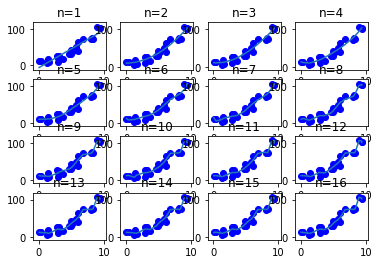

In [3]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(4,4)
for pos, degree in enumerate(range(1,17)):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(xs.reshape(-1,1), ys)
    result = model.predict(xs.reshape(-1,1))
    ax[pos//4][pos%4].plot(xs, result)
    ax[pos//4][pos%4].scatter(xs, ys, c='b')
    ax[pos//4][pos%4].set_title("n={}".format(degree))

## Геометрическая интерпретация разделения на дисперсию и разброс интерпретация для двумерного случая

Для двумерного случая линейная регрессия является задачей определения «линии наилучшего соответствия» для заданного набор точек данных. Для построения линии необходимо определить $A$ и $B$. Для оценки качества приближения используется среднеквадратичное отклонение

<a href='#toc'>Назад к Оглавлению</a>

# Пример 1 - построение линии регрессии "опыт"-"зарплата" <a name='example1'></a>

Зададим массив значений $x$ (Expirience) и $y$ (Salary).

In [4]:
df=pd.read_csv("input.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Expirience,0.00,0.30,0.50,0.80,1.10,1.3,1.60,1.8,2.10,2.40,2.60,2.90,3.20,3.40,3.70,3.90
Salary,14.41,12.24,14.43,14.88,16.29,20.2,19.04,23.5,23.35,24.61,28.61,28.58,30.93,33.52,38.81,42.88


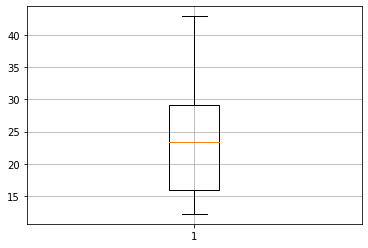

In [5]:
plt.boxplot(df["Salary"])
plt.grid(True)
plt.show()

Отобразим точки

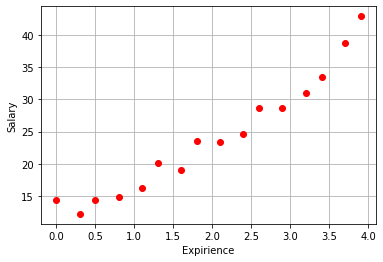

In [6]:
plt.plot(df["Expirience"],df["Salary"],'ro')
plt.xlabel("Expirience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

Будем искать приближение в виде линейной функции $y(x)=Ax+b$.

При этом сумма среднеквадратичных отклонений должна быть минимальна $$F(A,B)=\sqrt{\sum_{i=1}^{n}{\left[ Ax_i + B -y_i\right]^2}}\to \min$$

Экстремум (минимум) достигается в точке, в которой частные производные целевой функции $F(A,B)$ равны нулю: 
$$
\frac{\partial F(A,B)}{\partial A}=0,~\frac{\partial F(A,B)}{\partial B}=0.
$$
Из этих двух уравнений получается система линейных уравнений для нахождения коэффициентов $A$ и $B$:
$$
A \cdot n + B \cdot \sum_{i=1}^{n}{x_i}=\sum_{i=1}^{n}{y_i}
$$
$$
A \sum_{i=1}^{n}{x_i} + B \cdot \sum_{i=1}^{n}{x_i ^2}=\sum_{i=1}^{n}{x_i y_i}.
$$

Решаем СЛАУ методом обратной матрицы

In [7]:
xs = df["Expirience"]
ys = df["Salary"]
M = np.matrix([[len(xs), sum(xs)], [sum(xs), sum([i**2 for i in xs])]])
N = np.array([sum(ys), np.dot(xs, ys)])
invM = spla.inv(M)
S = np.dot(N,invM)
print("Коэффициент A: {}, коэффициент B:{}.".format(round(S[1], 2), round(S[0], 2)))

Коэффициент A: 7.12, коэффициент B:10.08.


Построим график функции $y(x)=Ax+B$ совместно с заданными точками.
Также построим предсказываемое значение для $x=5$ (желтый ромб в правом верхнем углу).

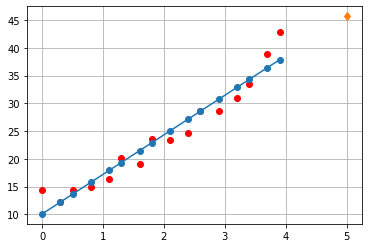

Примерный размер зарплаты при опыте работы 5 лет: 45.68


In [8]:
plt.plot(xs,ys,'ro')
plt.plot(xs,[S[1]*i+S[0] for i in xs], marker="o")
plt.plot(5,S[1]*5+S[0], marker='d')
plt.grid(True)
plt.show()
print("Примерный размер зарплаты при опыте работы 5 лет: {:.2f}".format(S[1]*5+S[0]))

Оценим среднее квадратичное отклонение.

In [9]:
vErr=0
for i in range(len(xs)):
    for j in range(len(ys)):
        if i==j: vErr += (S[1]*xs[j] + S[0] - ys[j])**2
print("Среднеквадратичное отклонение: {:.2f}".format(math.sqrt(vErr)))

Среднеквадратичное отклонение: 8.90


Добавим дополнительный признак - квадрат уже имеющегося признака $x$. Для этого построим приближение в виде квадратичной функции $y(x)=Ax^2+Bx+C$

При этом функция ошибки имеет вид: $$F(A,B,C)=\sqrt{\sum_{i=1}^{n}{\left[ Ax_i^2 + Bx_i + C -y_i\right]^2}}\to \min$$.

Минимум функции ищется методом градиентного спуска по следующему алгоритму:
<ul>
    <li>Выбираем точку $(x_0,y_0)$ - заданное начальное приближение</li>
    <li>Делаем шаг с заданной длиной $h$ (например $h=0.01$) в направлении вектора антиградиента</li>
    <li>Оцениваем расстояние между соседними точками - если оно меньше заданной точности $\epsilon$ 
        (например, $\epsilon=0.01$), то останавливаем работу алгоритма и последнее найденное значение 
        $(x_n, y_n)$ объявляем решением.
    </li>
</ul>

Реализация градиентного спуска в Python
$$
x_{n+1}=x_n - h \left. \frac{\frac{\partial F(x,y)}{\partial x}}{\left| \nabla \vec{F(x,y)}\right|} \right|_{(x_n,y_n)}
y_{n+1}=y_n - h \left. \frac{\frac{\partial F(x,y)}{\partial y}}{\left| \nabla \vec{F(x,y)}\right|} \right|_{(x_n,y_n)}
$$

In [10]:
def f(A,B,C):
    return math.sqrt(sum([(A*(i**2)+B*i+C-j)**2 for i,j in zip(xs,ys)]))

def grad_step(pf, pA, pB, pC, h):
    d=0.001
    l = math.sqrt(
        (pf(pA+d, pB  , pC  ) - pf(pA,pB,pC))**2 +
        (pf(pA  , pB+d, pC  ) - pf(pA,pB,pC))**2 +
        (pf(pA  , pB  , pC+d) - pf(pA,pB,pC))**2
    )
    rA = pA - h*((pf(pA+d, pB  , pC  ) - pf(pA,pB,pC))/l)
    rB = pB - h*((pf(pA  , pB+d, pC  ) - pf(pA,pB,pC))/l)
    rC = pC - h*((pf(pA  , pB  , pC+d) - pf(pA,pB,pC))/l)             
    return round(rA,3), round(rB,3), round(rC,3)

Применим метод градиентного спуска для отыскания коэффициентов $A$, $B$, $C$ в цикле из 10000 шагов, отобразим график функции $y(x)=Ax^2+Bx+C$ для каждого 1000-го вычисления, очевидно графики приближаются к заданным точкам.

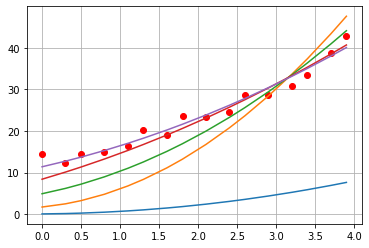

Wall time: 1.4 s


In [11]:
%%time
m = []
rA, rB, rC = 0, 0, 0
for _ in range(2000):
    rA, rB, rC = grad_step(f, rA, rB, rC, 0.01)
    m.append((rA, rB, rC))
plt.plot(xs,ys,'ro')
for A, B, C in m[50::400]:
    plt.plot(xs, [A*i**2+B*i+C for i in xs])
plt.grid(True)
plt.show()    

Отобразим итоговый результат и используем построенную функцию для предсказания значения при $x=5$.

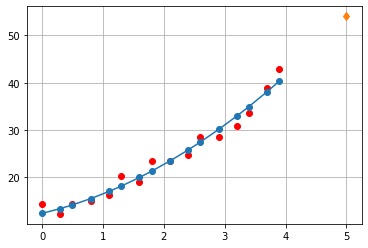

Примерный размер зарплаты при опыте работы 5 лет: 54.07


In [12]:
plt.plot(xs, ys, 'ro')
plt.plot(xs, [rA*(i**2)+rB*i+rC for i in xs], marker="o")
plt.plot(5, rA*(5**2)+rB*5+rC, marker='d')
plt.grid(True)
plt.show()
print("Примерный размер зарплаты при опыте работы 5 лет: {:.2f}".format(rA*(5**2)+rB*5+rC))

Вычислим функцию ошибки.

In [13]:
vErr=0
for i in range(len(xs)):
    for j in range(len(ys)):
        if i==j: vErr+=(rA*(xs[j]**2)+rB*xs[j]+rC-ys[j])**2
print("Среднеквадратичное отклонение равно: {:.2f}".format(math.sqrt(vErr)))

Среднеквадратичное отклонение равно: 5.88


Для использования модели линейной регрессии в библиотеке sklearn есть специальная модель LinearRegression().

In [14]:
xs=df["Expirience"]
x_train=np.array([[i] for i in xs])
ys=df["Salary"]
linreg = LinearRegression()
linreg.fit(x_train, ys)
print(linreg.coef_, linreg.intercept_)

[7.12016302] 10.080178035178031


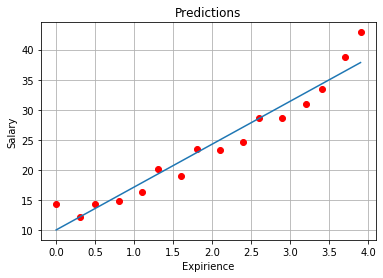

In [15]:
plt.plot(df["Expirience"],df["Salary"],'ro')
plt.plot(df["Expirience"],[linreg.coef_*i+linreg.intercept_ for i in df.Expirience])
plt.xlabel("Expirience")
plt.ylabel("Salary")
plt.title("Predictions")
plt.grid(True)
plt.show()

Для получения приближения с использованием произведений признака $x$ (3,4,5 степеней) можно использовать функцию библиотеки sklearn.preprocessing.PolynomialFeatures. При этом можно убрать лишние признаки с помощью sklearn.linear_model.Ridge. Для объединения нескольких действий в один поток (пайплайн, pipeline) используется функция sklearn.pipeline.make_pipeline.

In [16]:
xs = np.array([1, 2, 3]).reshape(-1,1)
r = PolynomialFeatures(3).fit_transform(xs)
print(r)

[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


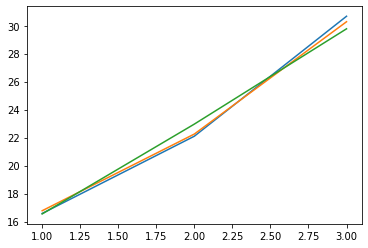

In [17]:
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(x_train, ys)
    y_plot = model.predict(np.array(xs).reshape(-1,1))
    plt.plot(xs, y_plot)

In [18]:
xs = np.array(range(1,11)).reshape(-1,1)
ys1 = np.array([i for i in xs])
ys2 = np.array([1/i for i in xs])
ys3 = np.array([5/i for i in ys2])

linreg1 = LinearRegression()
linreg1.fit(xs, ys1)
print(linreg1.score(xs, ys1))

linreg2 = LinearRegression()
linreg2.fit(xs, ys2)
print(linreg2.score(xs, ys2))

linreg3 = LinearRegression()
linreg3.fit(xs, ys3)
print(linreg3.score(xs, ys3))

1.0
0.653883518421269
1.0


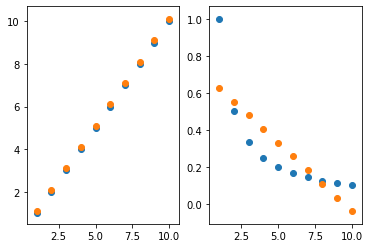

In [19]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(xs, ys1)
ax[0].scatter(xs, linreg1.predict(np.array(xs).reshape(-1,1))+0.1)
ax[1].scatter(xs, ys2)
ax[1].scatter(xs, linreg2.predict(np.array(xs).reshape(-1,1)))

<a href='#toc'>Назад к Оглавлению</a>

# Ссылки <a name='links'></a>

<a href='#toc'>Назад к Оглавлению</a>

# Домашнее задание

1. Построить функцию линейной регрессии. Найти значение при $\alpha=20000$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
t & 0 & 100 & 150 & 200 & 250 & 300 & 360
\\
\hline
\alpha & 18179 & 18216 & 18261 & 18323 & 18403 & 18500 & 18641
\end{array}
$$

2. Построить функцию линейной регрессии. Найти значение при $S=100$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c|c}
\theta & 273 & 283 & 288 & 294 & 313 & 333 & 353 & 373
\\
\hline
S & 29,4 & 33,3 & 35,2 & 37,2 & 45,8 & 55,2 & 65,6 & 77,3
\end{array}
$$

3. Построить функцию линейной регрессии. Найти значение при $P=20$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
\nu & 3,33 & 1,63 & 0,87 & 0,43 & 0,27 & 0,17 & 0,12
\\
\hline
P & 0,48 & 1,04 & 2,03 & 4,25 & 7,16 & 11,49 & 17,59
\end{array}
$$

4. Построить функцию линейной регрессии. Найти значение при $S=1$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
V & 2,40 & 3,50 & 5,20 & 6,89 & 10,00 & 12,55 & 13,67
\\
\hline
S & 0,014 & 0,028 & 0,056 & 0,119 & 0,226 & 0,315 & 0,566
\end{array}
$$



<a href='#toc'>Назад к Оглавлению</a>